In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import os
from scipy import stats
import mne
from scipy.signal import butter, filtfilt
from moduloproyecto import *
import re
from networkx.algorithms import community

C:\Users\HP\Documents\GitHub\Neurociencias-2026-1\S06_proyecto\venv_eeg\Lib\site-packages\mne\externals\tempita\__init__.py:35: DeprecationWarning: 'cgi' is deprecated and slated for removal in Python 3.13
  import cgi
C:\Users\HP\Documents\GitHub\Neurociencias-2026-1\S06_proyecto\venv_eeg\Lib\site-packages\mne\datasets\eegbci\eegbci.py:8: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


In [2]:
datos = r"C:\Users\HP\Documents\PLV_matrices_completas"

In [4]:
plv_dict = {}

pattern = re.compile(r"Tarea_(\d+)_Sujeto_(\d+)_PLV\.xlsx")

for file in os.listdir(datos):
    match = pattern.match(file)
    if match:
        tarea = match.group(1)
        sujeto = match.group(2)

        df = pd.read_excel(os.path.join(datos, file), index_col=0)

        if tarea not in plv_dict:
            plv_dict[tarea] = {}

        plv_dict[tarea][sujeto] = df

        print(f"Cargado: Tarea {tarea} – Sujeto {sujeto}")

    else:
        print("Archivo ignorado (no coincide con patrón):", file)

print("\nTareas encontradas:", list(plv_dict.keys()))

Cargado: Tarea 15 – Sujeto 10
Cargado: Tarea 15 – Sujeto 11
Cargado: Tarea 15 – Sujeto 12
Cargado: Tarea 15 – Sujeto 13
Cargado: Tarea 15 – Sujeto 14
Cargado: Tarea 15 – Sujeto 15
Cargado: Tarea 15 – Sujeto 16
Cargado: Tarea 15 – Sujeto 19
Cargado: Tarea 15 – Sujeto 1
Cargado: Tarea 15 – Sujeto 20
Cargado: Tarea 15 – Sujeto 21
Cargado: Tarea 17 – Sujeto 10
Cargado: Tarea 17 – Sujeto 11
Cargado: Tarea 17 – Sujeto 12
Cargado: Tarea 17 – Sujeto 13
Cargado: Tarea 17 – Sujeto 14
Cargado: Tarea 17 – Sujeto 15
Cargado: Tarea 17 – Sujeto 16
Cargado: Tarea 17 – Sujeto 17
Cargado: Tarea 17 – Sujeto 19
Cargado: Tarea 17 – Sujeto 1
Cargado: Tarea 17 – Sujeto 20
Cargado: Tarea 17 – Sujeto 21
Cargado: Tarea 1 – Sujeto 10
Cargado: Tarea 1 – Sujeto 11
Cargado: Tarea 1 – Sujeto 12
Cargado: Tarea 1 – Sujeto 13
Cargado: Tarea 1 – Sujeto 14
Cargado: Tarea 1 – Sujeto 15
Cargado: Tarea 1 – Sujeto 16
Cargado: Tarea 1 – Sujeto 17
Cargado: Tarea 1 – Sujeto 19
Cargado: Tarea 1 – Sujeto 1
Cargado: Tarea 1 – Suje

# Tarea 1 - Manipulación de EndoWrist

In [37]:
lista = lista_dfs(plv_dict["1"])
for i in range(len(lista)):
    np.fill_diagonal(lista[i].values, np.nan)
    
lista_recor, comunes = recortar_a_comunes(lista)
lista_recortada = [limpiar_nombres_canales(df.copy()) for df in lista_recor]

In [38]:
capsula_t1 = capsula(lista_recortada, 0.3, 0.6)
capsula_t1 = limpiar_nombres_canales(capsula_t1)
capsula_t1

,AF3,AF4,AF7,AF8,AFF1,AFF2,AFF5h,AFF6h,AFp3h,AFp4h,...,T7,T8,TP7,TP8,TPP10h,TPP7h,TPP8h,TPP9h,TTP7h,TTP8h
AF3,0,1,1,0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
AF4,1,0,0,1,0,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
AF7,1,0,0,0,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
AF8,0,1,0,0,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
AFF1,1,0,1,1,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TPP7h,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
TPP8h,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
TPP9h,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,1,0,0,1,0
TTP7h,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,1,0,1,0,0


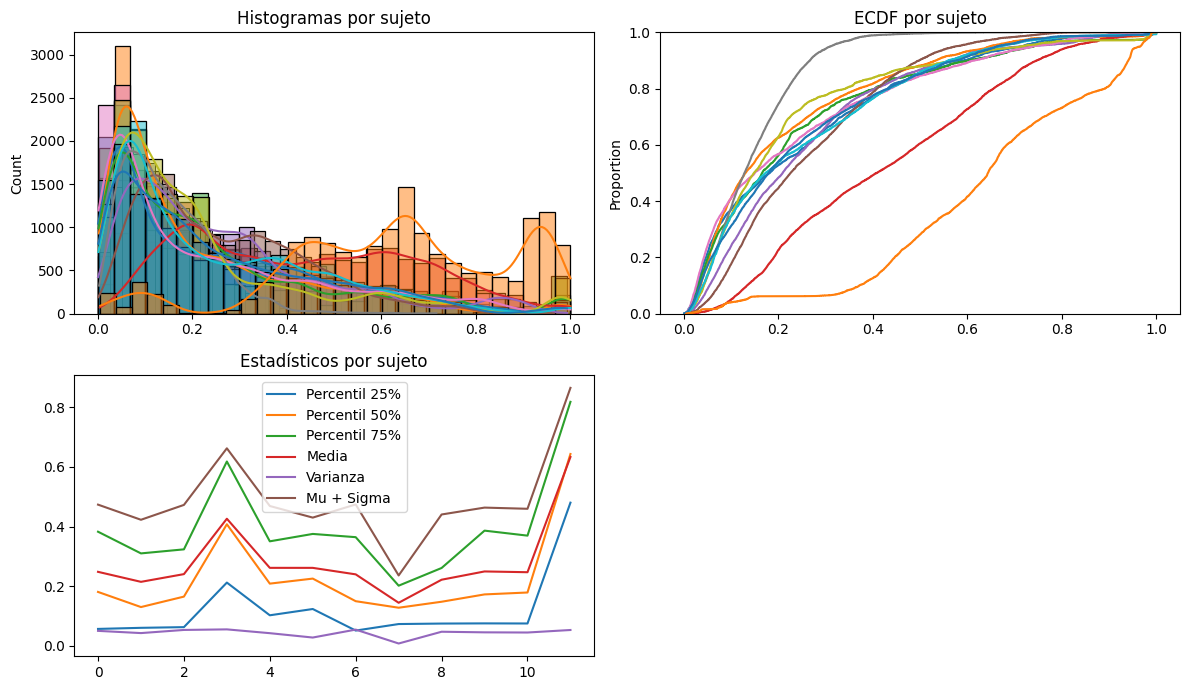

,th25,th50,th75,promedio,mu_sigma
min,0.051728,0.128287,0.202159,0.144852,0.23645
max,0.480422,0.643536,0.818313,0.633585,0.865139
mediana,0.07534,0.176105,0.367312,0.247912,0.466528
MAD,0.016257,0.030343,0.031368,0.013992,0.016832


In [39]:
tarea1 = lista_dfs((plv_dict["1"]))

tabla = analisis_estadisticos(tarea1)
tabla

Text(0.5, 0.98, 'Análisis para valor de umbral al 60% de la población en la tarea 1')

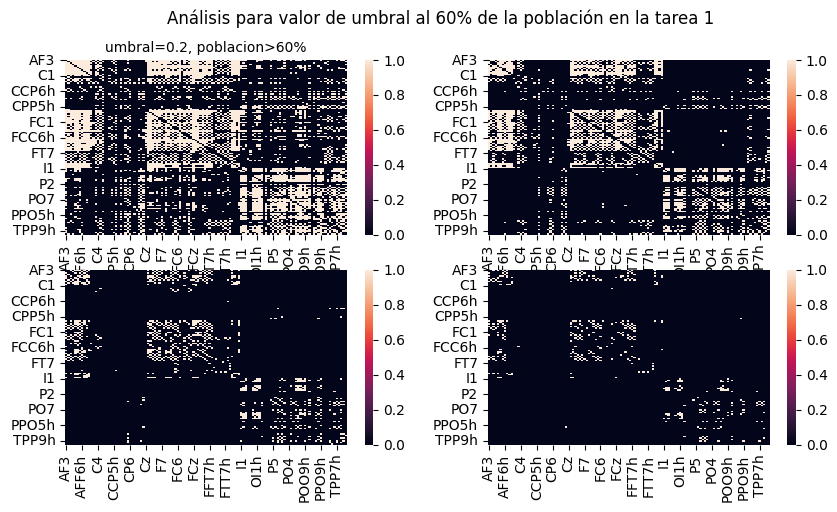

In [40]:
# Análisis para valor de umbral al 60% de la población en la tarea 1
tarea1u1 = capsula(lista_recortada, 0.2, 0.6)
tarea1u2 = capsula(lista_recortada, 0.3, 0.6)
tarea1u3 = capsula(lista_recortada, 0.5, 0.6)
tarea1u4 = capsula(lista_recortada, 0.6, 0.6)

fig, axes = plt.subplots(2, 2, figsize=(10, 5))

sns.heatmap(tarea1u1, ax=axes[0, 0])
sns.heatmap(tarea1u2, ax=axes[0, 1])
sns.heatmap(tarea1u3, ax=axes[1, 0])
sns.heatmap(tarea1u4, ax=axes[1, 1])

# plt.title('Mapas de calor para comparativa de umbrales')
axes[0, 0].set_title('umbral=0.2, poblacion>60%', fontsize=10)
fig.suptitle('Análisis para valor de umbral al 60% de la población en la tarea 1')

In [41]:
G = nx.from_pandas_adjacency(capsula_t1)

result = metricas_grafo_resumido(G)

hub_principal = result["top5_hubs"][0]

comunidades = community.greedy_modularity_communities(G)

In [11]:
result

{'clustering': 0.6318264633864774,
 'path_length': nan,
 'small_world_sigma': nan,
 'modularidad': 0.4558112231438303,
 'eficiencia_global': 0.42806626453358243,
 'eficiencia_local': 0.7962241856232063,
 'top5_hubs': [('FCC1h', 0.09386558658181825),
  ('FFC4h', 0.05589784138612225),
  ('CCP6h', 0.05509071055929366),
  ('POO3h', 0.04871212683901724),
  ('TTP8h', 0.0462589257382512)],
 'comunidades': [frozenset({'CCP4h',
             'CCP6h',
             'CP2',
             'CP4',
             'CP5',
             'CP6',
             'CPP4h',
             'CPP5h',
             'CPP6h',
             'I1',
             'I2',
             'Iz',
             'M1',
             'O1',
             'O2',
             'OI1h',
             'OI2h',
             'P10',
             'P2',
             'P4',
             'P5',
             'P6',
             'P7',
             'P8',
             'P9',
             'PO10',
             'PO3',
             'PO4',
             'PO7',
             'PO8',

In [42]:
coords = generar_coords_esfera_para_canales(capsula_t1.index)
coords

,x,y,z
AF3,0.000000,1.000000,0.000000
AF4,-0.132431,0.983740,0.121318
AF7,0.022114,0.967480,-0.251980
AF8,0.187712,0.951220,0.244838
AFF1,-0.349332,0.934959,-0.061792
...,...,...,...
TPP7h,-0.340012,-0.934959,0.101207
TPP8h,0.158582,-0.951220,-0.264638
TPP9h,0.050692,-0.967480,0.247817
TTP7h,-0.145396,-0.983740,-0.105432


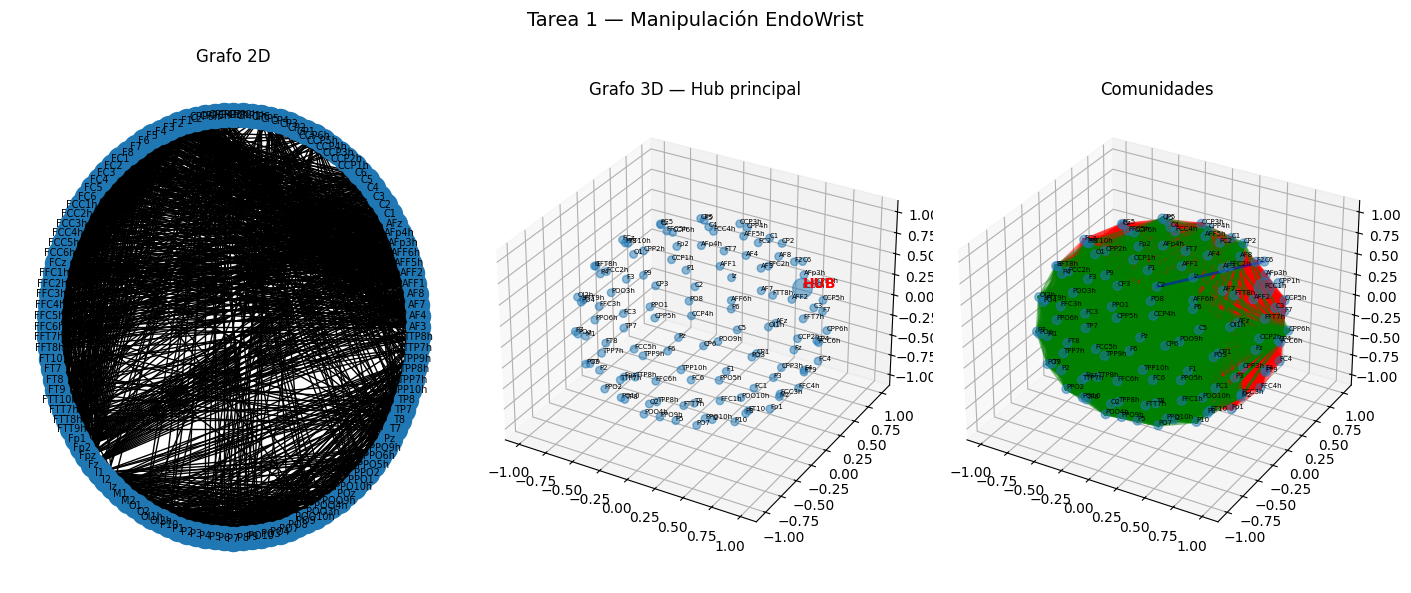

In [43]:
fig = plt.figure(figsize=(14, 6))

fig.suptitle("Tarea 1 — Manipulación EndoWrist", fontsize=14)

# grafo 2d
ax1 = fig.add_subplot(1, 3, 1)
grafo2D(capsula_t1, ax1)
ax1.set_title("Grafo 2D")

# grafo 3d
ax2 = fig.add_subplot(1, 3, 2, projection='3d')
grafo3D(coords, hub_principal, ax2)
ax2.set_title("Grafo 3D — Hub principal")

# grafo comunidades
ax3 = fig.add_subplot(1, 3, 3, projection='3d')
grafo_comunidades(comunidades, hub_principal, coords, ax3)

plt.tight_layout()
plt.show()

In [50]:
np.nanmean(capsula_t3.values)

np.float64(0.2855098855359001)

In [52]:
np.sum(capsula_t3.values == 1)

np.int64(4390)

# Tarea 2 Manipulación de EdnoWrits 2

In [37]:
lista2 = lista_dfs(plv_dict["4"])
for i in range(len(lista)):
    np.fill_diagonal(lista2[i].values, np.nan)
    
lista_recor2, comunes = recortar_a_comunes(lista2)
lista_recortada2 = [limpiar_nombres_canales(df.copy()) for df in lista_recor2]

In [49]:
capsula_t2 = capsula(lista_recortada2, 0.3, 0.6)
capsula_t2 = limpiar_nombres_canales(capsula_t2)
capsula_t2

,AF3,AF4,AF7,AF8,AFF1,AFF2,AFF5h,AFF6h,AFp3h,AFp4h,...,T7,T8,TP7,TP8,TPP10h,TPP7h,TPP8h,TPP9h,TTP7h,TTP8h
AF3,0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
AF4,1,0,1,1,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
AF7,1,1,0,1,1,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
AF8,1,1,1,0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
AFF1,1,1,1,1,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TPP7h,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
TPP8h,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,0,0,0,0,1
TPP9h,0,0,0,0,0,1,0,1,0,0,...,1,0,1,0,1,1,0,0,1,0
TTP7h,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,1,0,1,0,0


In [ ]:
tarea2 = lista_dfs(plv_dict["4"])

tabla2 = analisis_estadisticos(tarea2)
tabla2

In [ ]:
# Análisis para valor de umbral al 60% de la población en la tarea 3
tarea2u1 = capsula(lista_recortada2, 0.2, 0.6)
tarea2u2 = capsula(lista_recortada2, 0.3, 0.6)
tarea2u3 = capsula(lista_recortada2, 0.5, 0.6)
tarea2u4 = capsula(lista_recortada2, 0.6, 0.6)

fig, axes = plt.subplots(2, 2, figsize=(10, 5))

sns.heatmap(tarea2u1, ax=axes[0, 0])
sns.heatmap(tarea2u2, ax=axes[0, 1])
sns.heatmap(tarea2u3, ax=axes[1, 0])
sns.heatmap(tarea2u4, ax=axes[1, 1])

# plt.title('Mapas de calor para comparativa de umbrales')
axes[0, 0].set_title('umbral=0.2, poblacion>60%', fontsize=10)
fig.suptitle('Análisis para valor de umbral al 60% de la población en la tarea 3')

In [ ]:
G2 = nx.from_pandas_adjacency(capsula_t2)
result2 = metricas_grafo_resumido(G2)
hub_principal2 = result2["top5_hubs"][0]
comunidades2 = community.greedy_modularity_communities(G2)

In [ ]:
coords2 = generar_coords_esfera_para_canales(capsula_t1.index)
coords2

In [ ]:
fig = plt.figure(figsize=(14, 6))

fig.suptitle("Tarea 1 — Manipulación EndoWrist", fontsize=14)

# grafo 2d
ax1 = fig.add_subplot(1, 3, 1)
grafo2D(capsula_t2, ax1)
ax1.set_title("Grafo 2D")

# grafo 3d
ax2 = fig.add_subplot(1, 3, 2, projection='3d')
grafo3D(coords2, hub_principal2, ax2)
ax2.set_title("Grafo 3D — Hub principal")

# grafo comunidades
ax3 = fig.add_subplot(1, 3, 3, projection='3d')
grafo_comunidades(comunidades2, hub_principal2, coords2, ax3)

plt.tight_layout()
plt.show()

# Tarea 3 Cámara y embrague

In [48]:
lista3 = lista_dfs(plv_dict["9"])
for i in range(len(lista3)):
    np.fill_diagonal(lista3[i].values, np.nan)
    
lista_recor3, comunes = recortar_a_comunes(lista3)
lista_recortada3 = [limpiar_nombres_canales(df.copy()) for df in lista_recor3]

In [49]:
capsula_t3 = capsula(lista_recortada3, 0.3, 0.6)
capsula_t3 = limpiar_nombres_canales(capsula_t3)
capsula_t3

,AF3,AF4,AF7,AF8,AFF1,AFF2,AFF5h,AFF6h,AFp3h,AFp4h,...,T7,T8,TP7,TP8,TPP10h,TPP7h,TPP8h,TPP9h,TTP7h,TTP8h
AF3,0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
AF4,1,0,1,1,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
AF7,1,1,0,1,1,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
AF8,1,1,1,0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
AFF1,1,1,1,1,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TPP7h,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
TPP8h,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,0,0,0,0,1
TPP9h,0,0,0,0,0,1,0,1,0,0,...,1,0,1,0,1,1,0,0,1,0
TTP7h,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,1,0,1,0,0


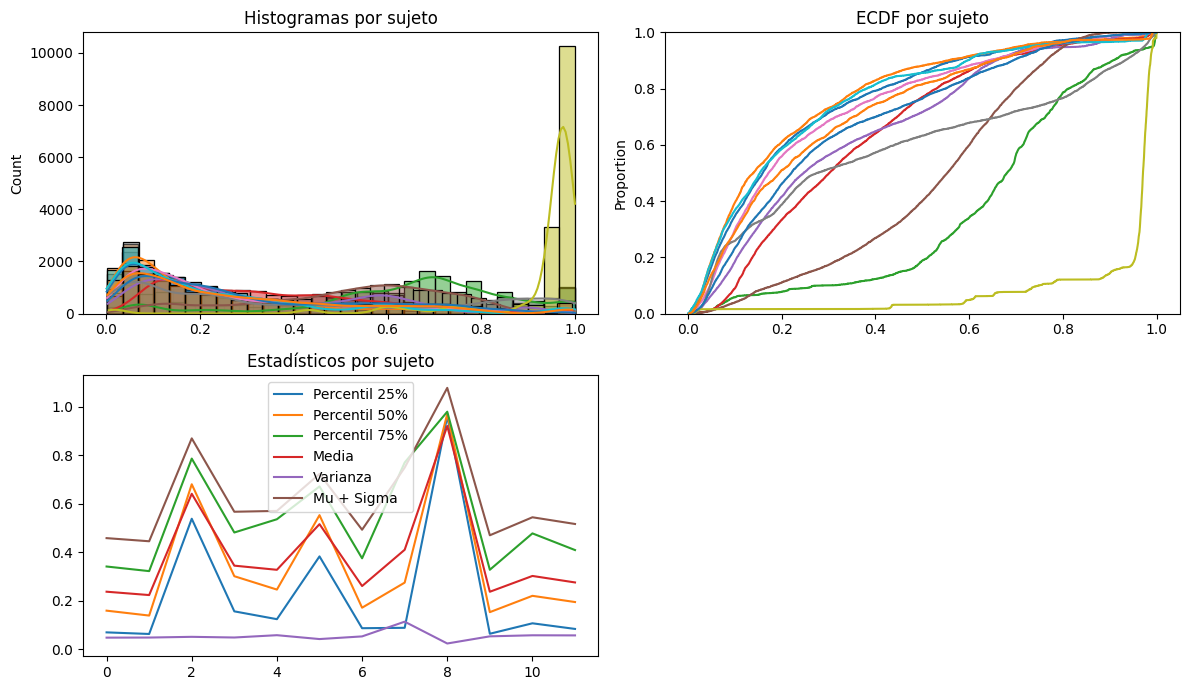

,th25,th50,th75,promedio,mu_sigma
min,0.063903,0.139767,0.322927,0.224255,0.445972
max,0.96041,0.970965,0.979879,0.92118,1.078178
mediana,0.098589,0.233996,0.480275,0.315685,0.556226
MAD,0.030921,0.070975,0.145053,0.077699,0.09147


In [53]:
tarea3 = lista_dfs(plv_dict["9"])

tabla3 = analisis_estadisticos(tarea3)
tabla3

Text(0.5, 0.98, 'Análisis para valor de umbral al 60% de la población en la tarea 3')

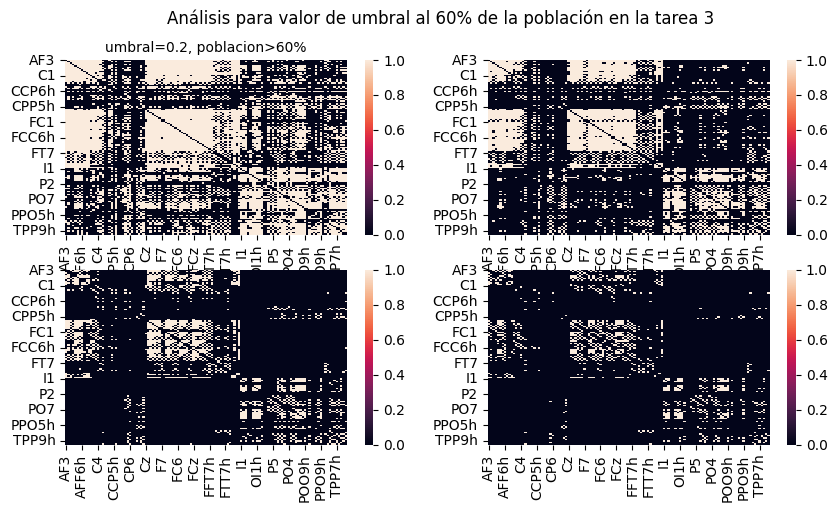

In [54]:
# Análisis para valor de umbral al 60% de la población en la tarea 3
tarea3u1 = capsula(lista_recortada3, 0.2, 0.6)
tarea3u2 = capsula(lista_recortada3, 0.3, 0.6)
tarea3u3 = capsula(lista_recortada3, 0.5, 0.6)
tarea3u4 = capsula(lista_recortada3, 0.6, 0.6)

fig, axes = plt.subplots(2, 2, figsize=(10, 5))

sns.heatmap(tarea3u1, ax=axes[0, 0])
sns.heatmap(tarea3u2, ax=axes[0, 1])
sns.heatmap(tarea3u3, ax=axes[1, 0])
sns.heatmap(tarea3u4, ax=axes[1, 1])

# plt.title('Mapas de calor para comparativa de umbrales')
axes[0, 0].set_title('umbral=0.2, poblacion>60%', fontsize=10)
fig.suptitle('Análisis para valor de umbral al 60% de la población en la tarea 3')

In [65]:
G3 = nx.from_pandas_adjacency(capsula_t3)
result3 = metricas_grafo_resumido(G3)
hub_principal3 = result3["top5_hubs"][0]
comunidades3 = community.greedy_modularity_communities(G3)

('O2', 0.0413494919312606)

In [56]:
coords3 = generar_coords_esfera_para_canales(capsula_t3.index)
coords3

,x,y,z
AF3,0.000000,1.000000,0.000000
AF4,-0.132431,0.983740,0.121318
AF7,0.022114,0.967480,-0.251980
AF8,0.187712,0.951220,0.244838
AFF1,-0.349332,0.934959,-0.061792
...,...,...,...
TPP7h,-0.340012,-0.934959,0.101207
TPP8h,0.158582,-0.951220,-0.264638
TPP9h,0.050692,-0.967480,0.247817
TTP7h,-0.145396,-0.983740,-0.105432


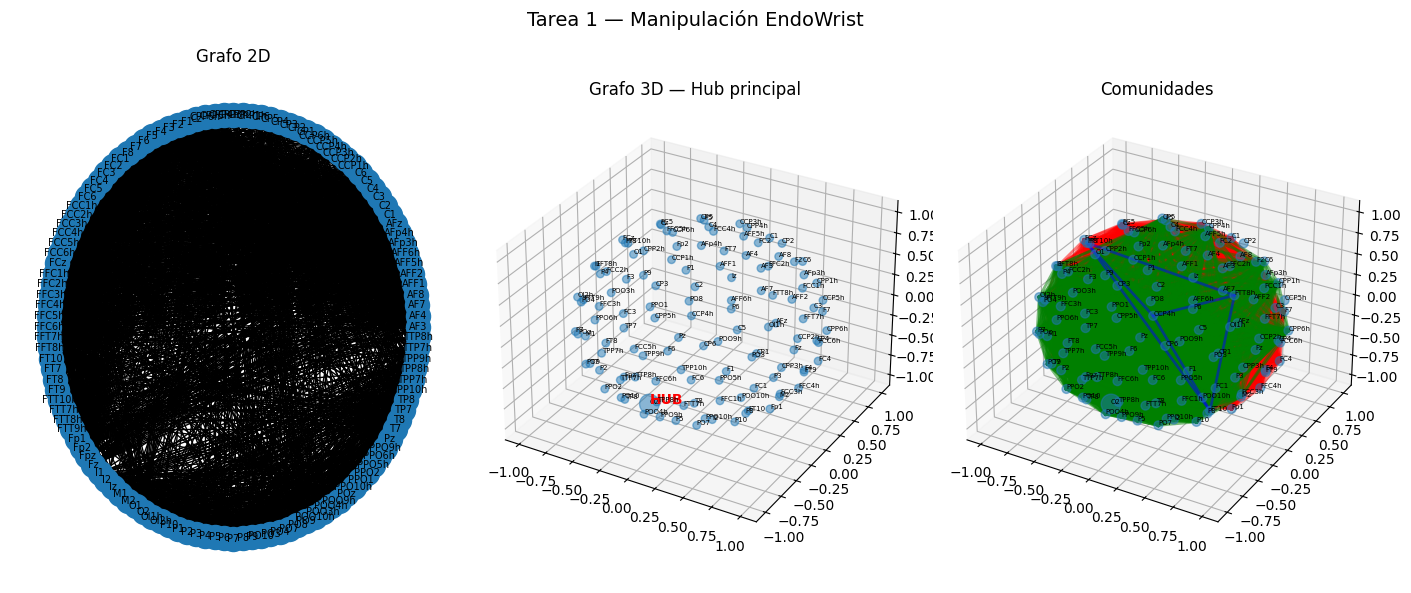

In [64]:
fig = plt.figure(figsize=(14, 6))

fig.suptitle("Tarea 1 — Manipulación EndoWrist", fontsize=14)

# grafo 2d
ax1 = fig.add_subplot(1, 3, 1)
grafo2D(capsula_t3, ax1)
ax1.set_title("Grafo 2D")

# grafo 3d
ax2 = fig.add_subplot(1, 3, 2, projection='3d')
grafo3D(coords3, hub_principal3, ax2)
ax2.set_title("Grafo 3D — Hub principal")

# grafo comunidades
ax3 = fig.add_subplot(1, 3, 3, projection='3d')
grafo_comunidades(comunidades3, hub_principal3, coords3, ax3)

plt.tight_layout()
plt.show()

# Tarea 4 - Control y manejo de la aguja

In [60]:
lista4 = lista_dfs(plv_dict["15"])
for i in range(len(lista4)):
    np.fill_diagonal(lista4[i].values, np.nan)
    
lista_recor4, comunes = recortar_a_comunes(lista4)
lista_recortada4 = [limpiar_nombres_canales(df.copy()) for df in lista_recor4]

In [61]:
capsula_t4 = capsula(lista_recortada4, 0.3, 0.6)
capsula_t4 = limpiar_nombres_canales(capsula_t4)
capsula_t4

,AF3,AF4,AF7,AF8,AFF1,AFF2,AFF5h,AFF6h,AFp3h,AFp4h,...,T7,T8,TP7,TP8,TPP10h,TPP7h,TPP8h,TPP9h,TTP7h,TTP8h
AF3,0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
AF4,1,0,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
AF7,1,1,0,1,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
AF8,1,1,1,0,0,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
AFF1,1,1,1,0,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TPP7h,0,0,0,0,0,0,0,0,0,0,...,1,0,1,1,1,0,0,1,1,0
TPP8h,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,0,0,1,0,1
TPP9h,0,0,0,0,0,0,0,0,0,0,...,1,0,1,1,1,1,1,0,1,0
TTP7h,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,1,0,1,0,0


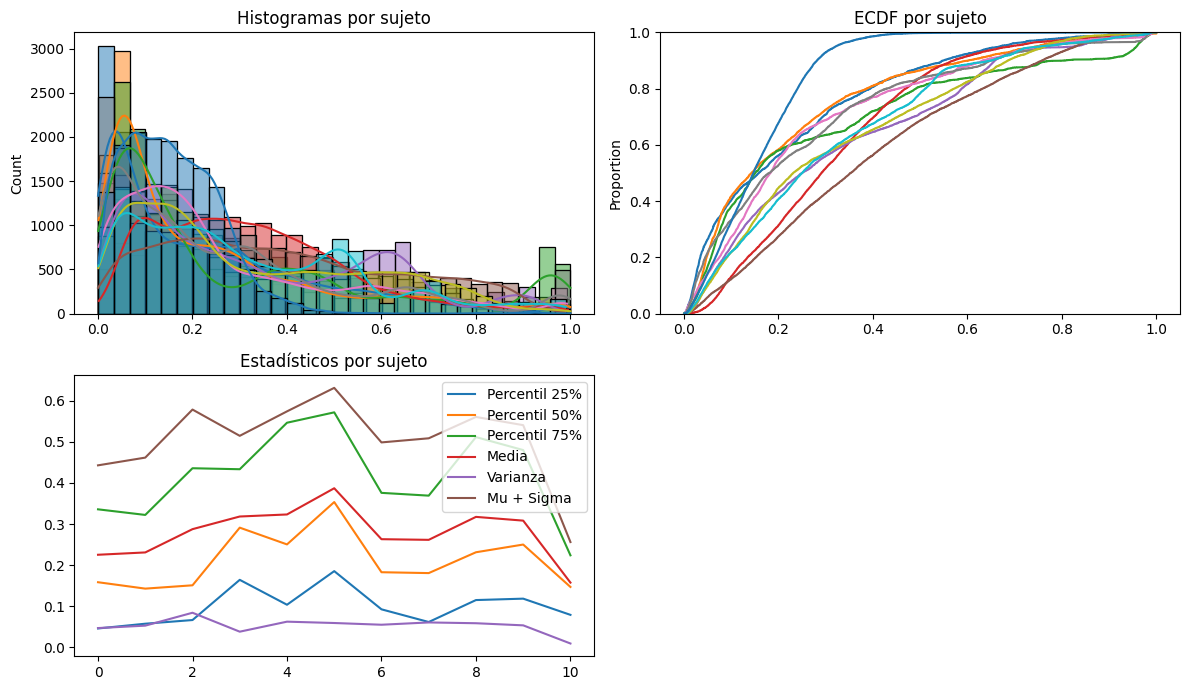

,th25,th50,th75,promedio,mu_sigma
min,0.04622,0.143049,0.223964,0.157648,0.256223
max,0.185558,0.35339,0.571374,0.386955,0.63087
mediana,0.092751,0.182898,0.433144,0.287554,0.514314
MAD,0.026035,0.039849,0.078134,0.030729,0.052917


In [66]:
tarea4 = lista_dfs((plv_dict["15"]))

tabla4 = analisis_estadisticos(tarea4)
tabla4

Text(0.5, 0.98, 'Análisis para valor de umbral al 60% de la población en la tarea 3')

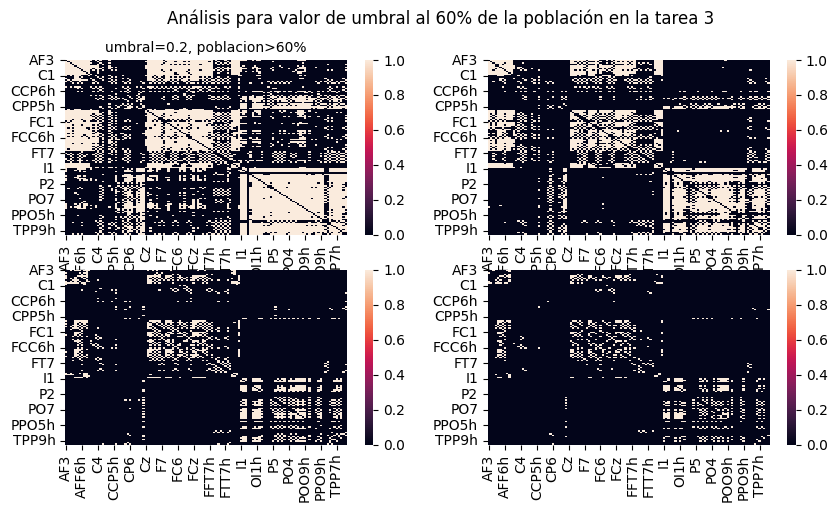

In [67]:
# Análisis para valor de umbral al 60% de la población en la tarea 3
tarea4u1 = capsula(lista_recortada4, 0.2, 0.6)
tarea4u2 = capsula(lista_recortada4, 0.3, 0.6)
tarea4u3 = capsula(lista_recortada4, 0.5, 0.6)
tarea4u4 = capsula(lista_recortada4, 0.6, 0.6)

fig, axes = plt.subplots(2, 2, figsize=(10, 5))

sns.heatmap(tarea4u1, ax=axes[0, 0])
sns.heatmap(tarea4u2, ax=axes[0, 1])
sns.heatmap(tarea4u3, ax=axes[1, 0])
sns.heatmap(tarea4u4, ax=axes[1, 1])

# plt.title('Mapas de calor para comparativa de umbrales')
axes[0, 0].set_title('umbral=0.2, poblacion>60%', fontsize=10)
fig.suptitle('Análisis para valor de umbral al 60% de la población en la tarea 3')

In [74]:
G4 = nx.from_pandas_adjacency(capsula_t4)
result4 = metricas_grafo_resumido(G4)
hub_principal4 = result4["top5_hubs"][0]
comunidades4 = community.greedy_modularity_communities(G4)

In [68]:
coords4 = generar_coords_esfera_para_canales(capsula_t4.index)
coords4

,x,y,z
AF3,0.000000,1.000000,0.000000
AF4,-0.132431,0.983740,0.121318
AF7,0.022114,0.967480,-0.251980
AF8,0.187712,0.951220,0.244838
AFF1,-0.349332,0.934959,-0.061792
...,...,...,...
TPP7h,-0.340012,-0.934959,0.101207
TPP8h,0.158582,-0.951220,-0.264638
TPP9h,0.050692,-0.967480,0.247817
TTP7h,-0.145396,-0.983740,-0.105432


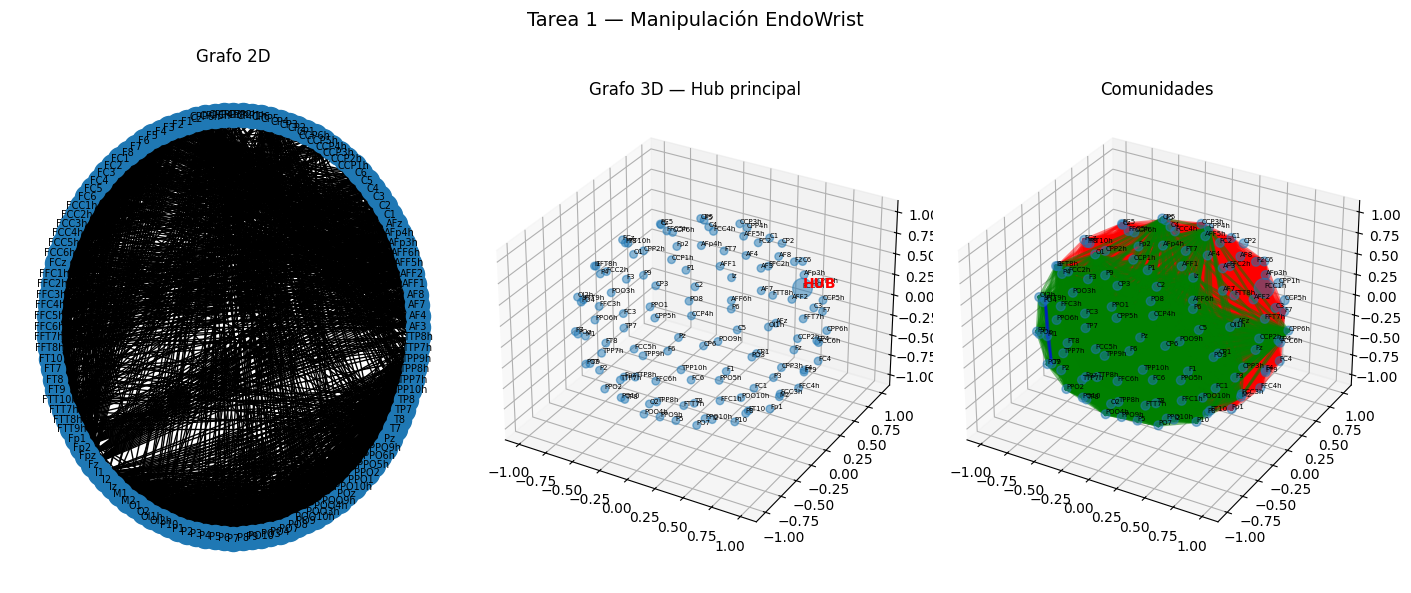

In [75]:
fig = plt.figure(figsize=(14, 6))

fig.suptitle("Tarea 1 — Manipulación EndoWrist", fontsize=14)

# grafo 2d
ax1 = fig.add_subplot(1, 3, 1)
grafo2D(capsula_t4, ax1)
ax1.set_title("Grafo 2D")

# grafo 3d
ax2 = fig.add_subplot(1, 3, 2, projection='3d')
grafo3D(coords4, hub_principal4, ax2)
ax2.set_title("Grafo 3D — Hub principal")

# grafo comunidades
ax3 = fig.add_subplot(1, 3, 3, projection='3d')
grafo_comunidades(comunidades4, hub_principal4, coords4, ax3)

plt.tight_layout()
plt.show()

# Tarea 5 Manejo de la aguja

In [ ]:
lista5 = lista_dfs(plv_dict["17"])
for i in range(len(lista5)):
    np.fill_diagonal(lista5[i].values, np.nan)
    
lista_recor5, comunes = recortar_a_comunes(lista5)
lista_recortada5 = [limpiar_nombres_canales(df.copy()) for df in lista_recor6]

In [ ]:
capsula_t5 = capsula(lista_recortada5, 0.3, 0.6)
capsula_t5 = limpiar_nombres_canales(capsula_t5)
capsula_t5

In [ ]:
tarea5 = lista_dfs((plv_dict["17"]))

tabla5 = analisis_estadisticos(tarea5)
tabla5

In [ ]:
# Análisis para valor de umbral al 60% de la población en la tarea 3
tarea5u1 = capsula(lista_recortada6, 0.2, 0.6)
tarea5u2 = capsula(lista_recortada6, 0.3, 0.6)
tarea5u3 = capsula(lista_recortada6, 0.5, 0.6)
tarea5u4 = capsula(lista_recortada6, 0.6, 0.6)

fig, axes = plt.subplots(2, 2, figsize=(10, 5))

sns.heatmap(tarea5u1, ax=axes[0, 0])
sns.heatmap(tarea5u2, ax=axes[0, 1])
sns.heatmap(tarea5u3, ax=axes[1, 0])
sns.heatmap(tarea5u4, ax=axes[1, 1])

# plt.title('Mapas de calor para comparativa de umbrales')
axes[0, 0].set_title('umbral=0.2, poblacion>60%', fontsize=10)
fig.suptitle('Análisis para valor de umbral al 60% de la población en la tarea 3')

In [ ]:
G5 = nx.from_pandas_adjacency(capsula_t5)
result5 = metricas_grafo_resumido(G5)
hub_principal5 = result5["top5_hubs"][0]
comunidades5 = community.greedy_modularity_communities(G5)

In [ ]:
coords5 = generar_coords_esfera_para_canales(capsula_t5.index)
coords5

In [ ]:
fig = plt.figure(figsize=(14, 6))

fig.suptitle("Tarea 1 — Manipulación EndoWrist", fontsize=14)

# grafo 2d
ax1 = fig.add_subplot(1, 3, 1)
grafo2D(capsula_t5, ax1)
ax1.set_title("Grafo 2D")

# grafo 3d
ax2 = fig.add_subplot(1, 3, 2, projection='3d')
grafo3D(coords5, hub_principal5, ax2)
ax2.set_title("Grafo 3D — Hub principal")

# grafo comunidades
ax3 = fig.add_subplot(1, 3, 3, projection='3d')
grafo_comunidades(comunidades5, hub_principal5, coords5, ax3)

plt.tight_layout()
plt.show()

# Tarea 6 - Energía y disección

In [76]:
lista6 = lista_dfs(plv_dict["23"])
for i in range(len(lista6)):
    np.fill_diagonal(lista6[i].values, np.nan)
    
lista_recor6, comunes = recortar_a_comunes(lista6)
lista_recortada6 = [limpiar_nombres_canales(df.copy()) for df in lista_recor6]

In [77]:
capsula_t6 = capsula(lista_recortada6, 0.3, 0.6)
capsula_t6 = limpiar_nombres_canales(capsula_t6)
capsula_t6

,AF3,AF4,AF7,AF8,AFF1,AFF2,AFF5h,AFF6h,AFp3h,AFp4h,...,T7,T8,TP7,TP8,TPP10h,TPP7h,TPP8h,TPP9h,TTP7h,TTP8h
AF3,0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
AF4,1,0,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
AF7,1,1,0,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
AF8,1,1,1,0,1,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
AFF1,1,1,1,1,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TPP7h,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,1,1,1,0
TPP8h,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,1,0,1,0,1
TPP9h,0,0,0,0,0,0,0,0,0,0,...,1,0,1,1,1,1,1,0,1,0
TTP7h,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,1,0,1,0,0


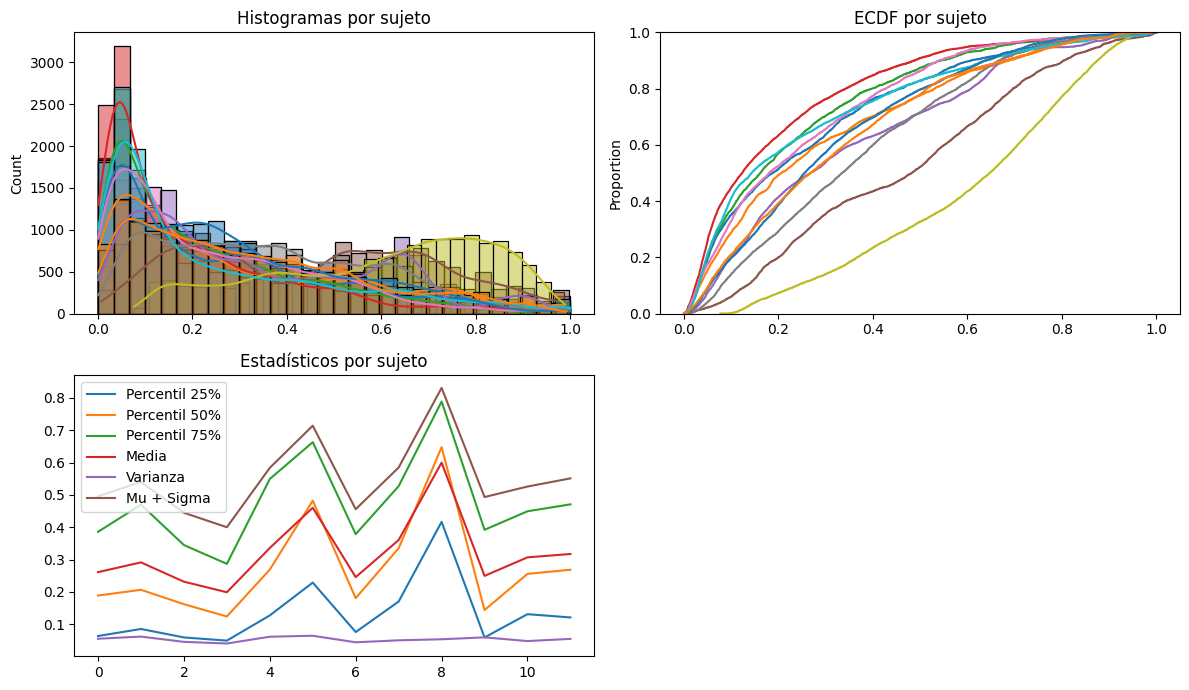

,th25,th50,th75,promedio,mu_sigma
min,0.04933,0.123921,0.286735,0.198901,0.399982
max,0.416564,0.647515,0.788705,0.599704,0.83102
mediana,0.103161,0.231131,0.459593,0.299078,0.532875
MAD,0.041773,0.059813,0.077404,0.05145,0.051341


In [78]:
tarea6 = lista_dfs((plv_dict["23"]))

tabla6 = analisis_estadisticos(tarea6)
tabla6

Text(0.5, 0.98, 'Análisis para valor de umbral al 60% de la población en la tarea 3')

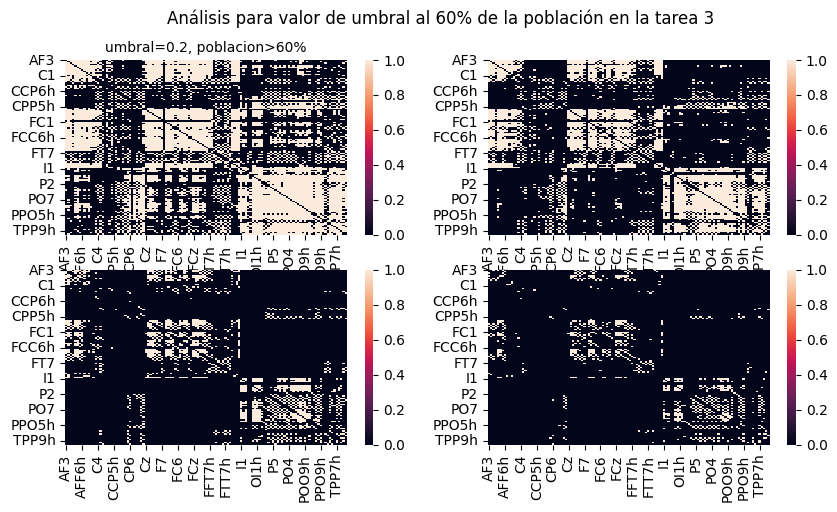

In [79]:
# Análisis para valor de umbral al 60% de la población en la tarea 3
tarea6u1 = capsula(lista_recortada6, 0.2, 0.6)
tarea6u2 = capsula(lista_recortada6, 0.3, 0.6)
tarea6u3 = capsula(lista_recortada6, 0.5, 0.6)
tarea6u4 = capsula(lista_recortada6, 0.6, 0.6)

fig, axes = plt.subplots(2, 2, figsize=(10, 5))

sns.heatmap(tarea6u1, ax=axes[0, 0])
sns.heatmap(tarea6u2, ax=axes[0, 1])
sns.heatmap(tarea6u3, ax=axes[1, 0])
sns.heatmap(tarea6u4, ax=axes[1, 1])

# plt.title('Mapas de calor para comparativa de umbrales')
axes[0, 0].set_title('umbral=0.2, poblacion>60%', fontsize=10)
fig.suptitle('Análisis para valor de umbral al 60% de la población en la tarea 3')

In [80]:
G6 = nx.from_pandas_adjacency(capsula_t6)
result6 = metricas_grafo_resumido(G6)
hub_principal6 = result6["top5_hubs"][0]
comunidades6 = community.greedy_modularity_communities(G6)

In [81]:
coords6 = generar_coords_esfera_para_canales(capsula_t6.index)
coords6

,x,y,z
AF3,0.000000,1.000000,0.000000
AF4,-0.132431,0.983740,0.121318
AF7,0.022114,0.967480,-0.251980
AF8,0.187712,0.951220,0.244838
AFF1,-0.349332,0.934959,-0.061792
...,...,...,...
TPP7h,-0.340012,-0.934959,0.101207
TPP8h,0.158582,-0.951220,-0.264638
TPP9h,0.050692,-0.967480,0.247817
TTP7h,-0.145396,-0.983740,-0.105432


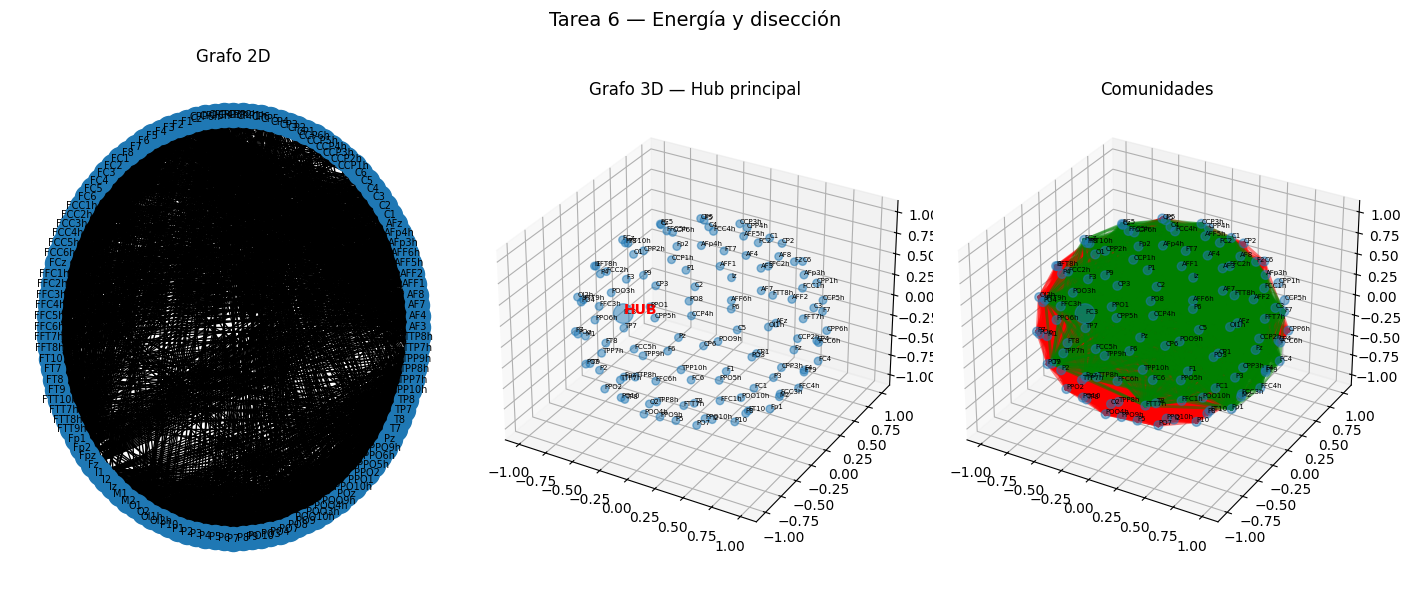

In [82]:
fig = plt.figure(figsize=(14, 6))

fig.suptitle("Tarea 6 — Energía y disección", fontsize=14)

# grafo 2d
ax1 = fig.add_subplot(1, 3, 1)
grafo2D(capsula_t6, ax1)
ax1.set_title("Grafo 2D")

# grafo 3d
ax2 = fig.add_subplot(1, 3, 2, projection='3d')
grafo3D(coords6, hub_principal6, ax2)
ax2.set_title("Grafo 3D — Hub principal")

# grafo comunidades
ax3 = fig.add_subplot(1, 3, 3, projection='3d')
grafo_comunidades(comunidades6, hub_principal6, coords6, ax3)

plt.tight_layout()
plt.show()